# ** 2. Differentiation**

Calculating an analytical solution to a derivative is not always feasible or possible. In such a situation, we turn to numerical differentiation. In the following notebook, we will be discussing two numerical differentiation methods, the forward difference and central difference. 

In order to derive the forward and central difference formulas, we begin with a Taylor series:

$$ f(x)\ =\ f(a)\ +\ \frac{f'(a)}{1!}(x-a)\ +\ \frac{f''(a)}{2!}(x-a)^2\ +\ \frac{f'''(a)}{3!}(x-a)^3\ +\ \dots\ +\ \frac{f^{(n)}(a)}{n!}(x-a)^n\ + \dots$$

where $a$ is the point about which the series is expanded. Performing a substitution using $(x\ -\ a) = h$:

$$ f(x)\ =\ f(a)\ +\ \frac{f'(a)}{1!}h\ +\ \frac{f''(a)}{2!}h^2\ +\ \frac{f'''(a)}{3!}h^3\ +\ \dots\ +\ \frac{f^{(n)}(a)}{n!}h^n\ + \dots$$

Here, $h$ is the step size for the differentiation. The choice of $h$ must be taken with great care as it has the potential of introducing error and rendering the solution incorrect and meaningless. The effects of this can be seen by considering the simple form of a derivative:

 $$f'(x)\ =\ \frac{f(x+h)-f(x)}{h}$$
 
A large value of $h$ will cause unrealistic results or a divergence as this neglects to capture the behavior of the functions derivative. On the other hand, a small value of $h$ introduces round-off errors, as a computer can only store numbers to a certain precision (often ~ $10^{-15}$ for personal computers) and any a step size smaller than this precision will return incorrect results. Round-off error can be introduced into numerical methods calculations in many ways:

1. Addition of nearly equal numbers
2. Subtracting a small from a large number
3. Division of by a small number
3. User input error (pi = 3.1415)
4. Data type coding error (double/float can result a loss of accuracy)

In differentiation, round-off errors results from the addition of nearly equal number. Thus an optimal value of $h$ exists which offers a trade off between the two forms of error.




The code block below imports the necessary modules, defines the function we will evaluate, the corresponding analytical derivative, and the initial variables.


**An important note for this notebooks:** when defining functions, you may want to explore functions not included in Python by default, such as sine, cosine, e, etc. We typically incorporate these functions through the Numpy module by first importing Numpy as np in the beginning of our code and then defining these functions as np.sin(), np.cos(), and np.exp(). However, for this notebook, we will use a slightly different module called Sympy to define these functions. As you can see. we have imported Sympy as syp. This means when you want to call to a function from the Sympy library, import them as syp.sin(), syp.cos(), syp.exp(). The Sympy package will help us calculate the analytical gradients using Python, enabling you to check errors of differentiation from the true result, but saving you the trouble from calculating them by hand.  

In [32]:
###########
# IMPORTS #
###########
# These are packages needed to perform the math and visualization
import numpy as np
import IPython
from IPython.display import Math
import matplotlib.pyplot as plt
import plotting_functions as pf
import sympy as syp
syp.init_printing(use_unicode=False, wrap_line=False, no_global=True)
%matplotlib notebook

#############
# FUNCTIONS #
#############


def f(x):
    """
    Defining the function to be evaluated
    INPUT
        float x
    OUTPUT
        float 
    """
    return x**2


###############
# GLOBAL VARS #
###############
# point at which we would like to evaluate the derivative
x = 1.0
# step size: difference between x and a
dx = 1e-6
# the range of x values we would like to plot between:
x_minimum = -1.5
x_maximum = 2
#exact derivative to compare our approximation to.
exact_first_derivative = pf.analytical_first_derivative(f,x)
exact_second_derivative = pf.analytical_second_derivative(f,x)
# dictionaries to hold error of each method
error_1 = dict()
error_2 = dict()


## ** 2.1  Forward Difference Formula for First Derivatives **

In order to obtain the forward difference formula, we truncate the Taylor series after the first derivative term. 

This gives the following

$$ f(x)\ \sim\ f(a+h)\ =\ f(a)\ +\ hf'(a)\ +\ \mathcal{O}(h^2)$$

The $O(h^2)$ term might be new to some of you. This notation indicates the magnitude of the error introduced by truncating the Taylor series, for this reason it is referred to as the truncation error. Rearranging the above expresion to isolate $f'(a)$,

$$ f'(a)\ =\ \frac{f(a+h)\ -\ f(a)}{h} + \mathcal{O}(h^2)$$

This formula represents the forward difference approximation. In the plot below, a geometric interpretation of the forward difference approximation is given to the function you defined above.  Here, the tangent line through $f(a)$ is shown in red. The approximation is shown between the $f(a)$ (red point) and $f(a+h)$ (blue point). The approximation to the first derivative is taken as the secant line between the two points, shown in green. A graphical representation of the forward difference approximation (in red) implemented on $f(x)$ (in black) is shown below. What you should notice is that the approximation, is not quite overlaid with the actual tangent line. 

<IPython.core.display.Javascript object>


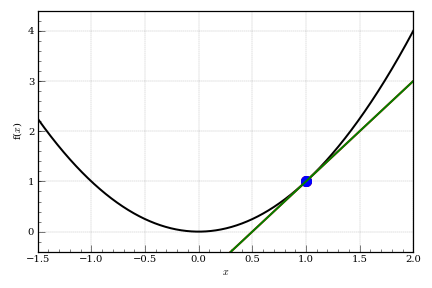

In [18]:
#input variables are:
#(x minimum, x maximum, function, derivative of f, x, step size)
pf.plot_fdiff_func(x_minimum, x_maximum, f, pf.analytical_first_derivative, x, dx)

Applying this method to a real problem, the following Python code approximates the derivative of the function defined in the first code block of the notebook. By default the function is $f(x)\ =\ e^{x^2}$ at the point $x\ =\ 1$. 

The code implementing the forward difference approximation of $f(x)$ is shown below.  The Python code considers the value approximated with the Forward Difference method and calculates the error when compared to the analytical first derivative.

In [17]:
#############
# FUNCTIONS #
#############

def Forward_Diff(a, h):
    """
    Calculates the first derivative based on the Forward Difference method
    INPUT
        float a: the initial starting point
        float h: the step size
    OUTPUT
        float: first derivative evaluated at a
    """
    fd_step_size_result = pf.step_size_check(h)
    if step_size_result['result'] == True:
        print(step_size_result['message'])
        return (f(a + h) - f(a)) / h
    else:
        print(step_size_result['message'])
        return (f(a + h) - f(a)) / h


#############
# MAIN CODE #
#############
approximation = Forward_Diff(x, dx)
method = "Forward Difference"
error_1[method] = approximation - exact_first_derivative
print("Method: {}".format(method))
print("Approximation of f'({}) = {}".format(x, approximation))
print("Exact Evaluation of f'({}) = {}".format(x,exact_first_derivative))
print("Error = {}".format(error_1["Forward Difference"]))

AttributeError: module 'plotting_functions' has no attribute 'step_size_check'

## ** 2.2 Forward Difference Determination of Second Derivatives **

The forward difference method can be extended to second derivatives. This requires two points that are spaced by an interval of $h$, $x = a+h$ and $x= a+2h$.
Each of these terms are expanded into their respective Taylor series:

$x=a+h$
$$f(x)= f(a+h) = f(a)+ f'(a)(h) + \frac{f''(a)(h)^2}{2}$$

$$f'(a)= \frac{f(a+h) - f(a) - \frac{f''(a)(h)^2}{2}}{h}$$

$x=a+2h$
$$ f(x)= f(a+2h) = f(a)+ f'(a)(2h) + \frac{f''(a)(2h)^2}{2}$$
$$ f'(a)= \frac{f(a+2h)- f(a) -f''(a)(2h^2)}{2h}$$

We can set these two terms equal to each other:

$$\frac{f(a+h) - f(a) - \frac{f''(a)(h)^2}{2}}{h}=\frac{f(a+2h)- f(a) -f''(a)(2h^2)}{2h}$$
multiply by $2h$ on both sides,

$$2f(a+h) - 2f(a) - f''(a)(h)^2=f(a+2h)- f(a) -f''(a)(2h^2)$$

collect the like terms, isolating $f''(a)$

$$f''(a)(2h^2) - f''(a)(h)^2= f(a+2h) -2f(a+h)+ 2f(a) -f(a) $$

Simplifying this expression results in:
$$ f''(a)\ =\ \frac{f(a+2h)-2f(a+h)+f(a)}{h^2}$$

If you are running this notebook with the example equation of $f(x)\ =\ e^{x^2}$, we can also calculate a second derivative:
$$f(x)\ =\ e^{x^2}$$

$$f'(x) = 2xe^{x^2}$$

$$f''(x) = 4x^2e^{x^2}+2e^{x^2}$$

The Python code for the second derivative estimation with Forward Difference is shown below. The code considers the exact value from the analytical equation and calculates the error associated with the Forward Difference Approximation. Again, with the given example, the analytical answer to the second derivative is $f''(x)$ at $ x\ =\ 1$ is $10.87$. 

In [ ]:
###########
# IMPORTS #
###########
import numpy as np
#############
# FUNCTIONS #
#############


def Forward_Diff_2nd(f,a, h):
    """
    Calculates the second derivative based on the Forward Difference method
    INPUT
        float a: the initial starting point
        float h: the step size
    OUTPUT
        float: second derivative evaluated at a
    """
    return (f(a + 2 * h) - 2 * f(a + h) + f(a)) / (h**2)
#############
# MAIN CODE #
#############
approximate = Forward_Diff_2nd(f,x, dx)
method = "Forward Difference"
error_2[method] = approximate - exact_second_derivative
print("Method: {}".format(method))
print("Approximation of f''({}) = {}".format(x, approximate))
print("Exact Evaluation of f''({}) = {}".format(x, exact_second_derivative))
print("Error = {}".format(error_2["Forward Difference"]))

## ** 2.3  Central Difference Formula for First Derivatives**

The forward difference formula is one estimation of the derivative, but introduces large truncation error and thus we want to consider more accurate methods. The central difference formula can also provide useful approximation for first derivatives with a reduction of truncation error.  In order to obtain this relationship, one takes two similar Taylor expressions as shown above for the Forward difference formula, but here we don't just look at a point in the positive direction of a, but also in the negative direction of a. This will capture behavior of the curve surrounding the expansion point. 

$$ f(a+h)\ =\ f(a)\ +\ hf'(a)\ +\ \frac{h^2}{2}f''(a)\ +\ O(h^3) $$

$$ f(a-h)\ =\ f(a)\ -\ hf'(a)\ +\ \frac{h^2}{2}f''(a)\ +\ O(h^3) $$

Subtracting the second Taylor series expression from the first gives:

$$ f(a+h)\ -\ f(a-h)\ =\ 2hf'(a)  + \mathcal{O}(h^3)$$

We rearrange and isolate for $f'(a)$:

$$ f'(a)\ =\ \frac{f(a+h)\ -\ f(a-h)}{2h} +\mathcal{O}(h^3)$$
 

The code implementing the central difference approximation on $f(x)$ is shown below. The Python code considers this actual value and calculates the error associated with the central difference approximation. 

A graphical representation of the central difference approximation of the first dervative is given when the plotting command below is ran. Run the code now. Here, $a$ is the red point at $(a,f(a))$ with the tangent line, also shown in red, represents the analytical value at that point. The Central Difference approximation occurs at $f(a+h)$ and $f(a-h)$, the blue points. The blue line is the secant line between them. By comparison of the two methods, we see that the Central Differnce method gives a much better approximation of the first derivative as compared to the Forward Difference method.

In [ ]:
#input variables are:
#(x minimum, x maximum, function, derivative of f, x, step size)
pf.plot_cdiff_func(x_minimum, x_maximum, f, pf.analytical_first_derivative, x, dx)

In [ ]:
#############
# FUNCTIONS #
#############


def Central_Diff(a, h):
    """
    Calculates the second derivative based on the Central Difference method
    INPUT
        float a: the initial starting point
        float h: the step size
    OUTPUT
        float: first derivative evaluated at a
    """
    step_size_result=cd_step_size_result = pf.step_size_check(h)
    if step_size_result['result'] == True:
        print(step_size_result['message'])
        return (f(a + h) - f(a - h)) / (2 * h)
    else:
        print(step_size_result['message'])
        return (f(a + h) - f(a - h)) / (2 * h)
#############
# MAIN CODE #
#############
approximation = Central_Diff(x, dx)
method = "Central Difference"
error_1[method] = approximation - exact_first_derivative
print("Method: {}".format(method))
print("Approximation of f'({}) = {}".format(x, approximation))
print("Exact Evaluation of f'({})  = {}".format(x,exact_first_derivative))
print("Error = {}".format(error_1["Central Difference"]))

## ** 2.4  Central Difference Formula for Second Derivatives **

The previously discussed central difference formula can also be utilized to approximate the second derivative of a function.  Taking our two Taylor series expressions from above:

$$ f(a+h)\ =\ f(a)\ +\ hf'(a)\ +\ \frac{h^2}{2}f''(a)\ +\ \frac{h^3}{6}f'''(a)\ +\ O(h^4) $$

$$ f(a-h)\ =\ f(a)\ -\ hf'(a)\ +\ \frac{h^2}{2}f''(a)\ -\ \frac{h^3}{6}f'''(a)\ +\ O(h^4) $$

we add these expressions in this case as opposed to the subtraction that was used to obtain the central difference formula for first derivatives.  Upon addition, we obtain:

$$ f(a+h)\ +\ f(a-h)\ =\ 2f(a)\ +\ h^2f''(a)\ +\ O(h^4) $$

Again, we ignore our error term as done previously, rearrange and isolate for $f''(a)$, and obtain:

$$ f''(a)\ =\ \frac{f(a+h)\ -\ 2f(a)\ +\ f(a-h)}{h^2} $$

The following Python code illustrates the central difference formula in practice on the same example discussed previously. The Python code considers this actual value and calculates the error associated with the central difference approximation.

In [ ]:
#############
# FUNCTIONS #
#############


def Central_Diff_2nd(a, h):
    """
    Calculates the second derivative based on the Central Difference method
    INPUT
        float a: the initial starting point
        float h: the step size
    OUTPUT
        float: second derivative evaluated at a
    """
    return (f(a + h) - 2 * f(a) + f(a - h)) / (h**2)
#############
# MAIN CODE #
#############
approximation = Central_Diff_2nd(x, dx)
method = "Central Difference"
error_2[method] = approximation - exact_second_derivative
print("Method: {}".format(method))
print("Approximation of f''({}) = {}".format(x, approximation))
print("Exact Evaluation of f''({}) = {}".format(x,exact_second_derivative))
print("Error = {}".format(error_2["Central Difference"]))

# 2.5 What method should I choose

In [ ]:
print("{:-^39}".format(""))
print("{:^39}".format("FIRST DERIVATIVE"))
print("{:-^39}".format(""))
print("{:^25} : {:^11}".format("Method", "Error"))
print("{:->25}   {:->11}".format("", ""))
for i in sorted(error_1, key=error_1.get, reverse=True):
    print( "{:>25} : {:>.5E}".format(i, error_1[i]))
print( "{:-^39}".format(""))

print("")
print("")

print("{:-^39}".format(""))
print("{:^39}".format("SECOND DERIVATIVE"))
print("{:-^39}".format(""))
print("{:^25} : {:^11}".format("Method", "Error"))
print("{:->25}   {:->11}".format("", ""))
for i in sorted(error_2, key=error_2.get, reverse=True):
    print("{:>25} : {:>.5E}".format(i, error_2[i]))
print("{:-^39}".format(""))


## Application problem goes here!

<IPython.core.display.Javascript object>


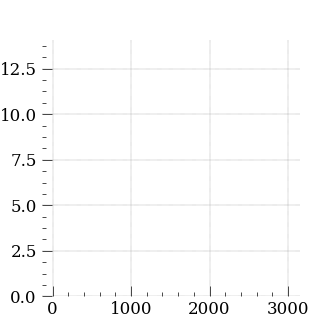

interactive(children=(FloatSlider(value=1.0, description='T', max=10000.0, min=1.0, step=1.0), Output()), _dom_classes=('widget-interact',))

interactive(children=(FloatSlider(value=1.0, description='deriv_x', max=3000.0, min=1.0, step=1.0), Output()), _dom_classes=('widget-interact',))

In [37]:
from matplotlib.widgets import Slider
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc

# Black body radiation
def black_body_radiation(wavelength,T):
#     wavelength *= 1e-6
    h = sc.h
    c = sc.c
    k = sc.k
    
    numerator = 2.0 * h * (c**2)
    exponent = (h*c)/(wavelength*k*T)
    denominator = (wavelength**5) * (np.exp(exponent) - 1.0)
    spectral_radiance = numerator / denominator
    spectral_radiance *= 1e-9 # m to nm
    spectral_radiance *= 1e-3 # W to kW
#     spectral_radiance /= (100*100) # m^-2 to cm^-2
    return spectral_radiance

# Set up variables 
T = 5000
wavelength = np.linspace(1e-8,3e-6,100) 


fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
# # plt.xlim(0, 3e-9)
plt.grid(True)

radiance = black_body_radiation(wavelength,T)
line, = ax.plot(wavelength*1e9, radiance)
plt.ylim(min(radiance), 1.1*(max(radiance)-min(radiance)))

deriv_x = 1e3

line2, = ax.plot([deriv_x,deriv_x],[0, 100], color = 'red')


def update(T = 5000):
    line.set_ydata(black_body_radiation(wavelength,T))
    fig.canvas.draw()
def update_x(deriv_x = 1000):
    line.set_xdata([deriv_x,deriv_x])
    fig.canvas.draw()

interact(update,T=FloatSlider(min=1, max=10000, step=1));
interact(update_x,deriv_x=FloatSlider(min=1, max=3000, step=1));

<IPython.core.display.Javascript object>


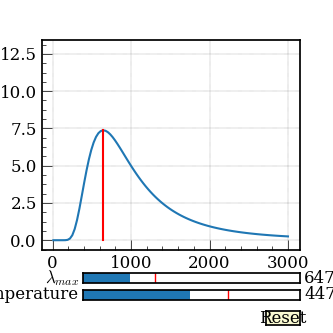

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import scipy.constants as sc

# Black body radiation
def black_body_radiation(wavelength,T):
#     wavelength *= 1e-6
    h = sc.h
    c = sc.c
    k = sc.k
    
    numerator = 2.0 * h * (c**2)
    exponent = (h*c)/(wavelength*k*T)
    denominator = (wavelength**5) * (np.exp(exponent) - 1.0)
    spectral_radiance = numerator / denominator
    spectral_radiance *= 1e-9 # m to nm
    spectral_radiance *= 1e-3 # W to kW
#     spectral_radiance /= (100*100) # m^-2 to cm^-2
    return spectral_radiance

# Set up variables 
initial_T = 5000
initial_lambdamax = 1e3
wavelength = np.linspace(1e-8,3e-6,100) 
# calculate spectral radiance
radiance = black_body_radiation(wavelength,T)

fig, ax = plt.subplots()
plt.grid(True)
plt.subplots_adjust(bottom=0.25)

ax.set_autoscale_on(True)
ax.autoscale_view(True,True,True)

line, = ax.plot(wavelength*1e9, radiance)
line2, = ax.plot([initial_lambdamax,initial_lambdamax], [0,max(radiance)], color='red')
# plt.ylim(min(radiance), 1.1*(max(radiance)-min(radiance)))
# plt.axis([0, 1, -10, 10])

axtemp = plt.axes([0.25, 0.1, 0.65, 0.03])
axlambdamax = plt.axes([0.25, 0.15, 0.65, 0.03])

s_temp= Slider(axtemp, 'Temperature', 3000, 6000, valinit=initial_T, valstep=1)
s_lambdamax = Slider(axlambdamax, r'$\lambda_{max}$', 1, 3000, valinit=initial_lambdamax, valstep=1)

def update(val):
    T = s_temp.val
    wavelength = np.linspace(1e-8,3e-6,100) 
    lambdamax = s_lambdamax.val
    
    radiance = black_body_radiation(wavelength,T)
    line.set_ydata(radiance)
    line2.set_data([lambdamax,lambdamax], [0,max(radiance)])
    axes.relim()
    axes.autoscale_view(True,True,True)
    fig.canvas.draw_idle()
    
s_temp.on_changed(update)
s_lambdamax.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    s_temp.reset()
    s_lambdamax.reset()
button.on_clicked(reset)


plt.show()